<a href="https://colab.research.google.com/github/praveenkumarbalakrishnan/tasks/blob/main/SIG731_Data_Wrangling_Task3P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title:** Task 3P: SIG731-Data Wrangling

**Name:** Praveenkumar Balakrishnan

**Student Number:** 223029369

**Email Address:** s223029369@deakin.edu.au

# Import Statements

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Tasks

**Task 1**

From https://github.com/gagolews/teaching-data/tree/master/marek, download the two following excerpts from the National Health and Nutrition Examination Survey (NHANES dataset):

• nhanes_adult_male_bmx_2020.csv

• nhanes_adult_female_bmx_2020.csv

They give body measurements of adult males and females.

Downloaded the given files and uploaded in the input data directory

**Task 2**

Read the two files as numpy matrices named male and female. Each matrix consists of seven
columns:
1. weight (kg),
2. standing height (cm),
3. upper arm length (cm),
4. upper leg length (cm),
5. arm circumference (cm),
6. hip circumference (cm),
7. waist circumference (cm).

Read the data using pandas.read_csv and filtered the commented line starts with "#" and converted it into numpy matrices each consist of 7 columns

In [7]:
male_df = pd.read_csv(
    "/content/drive/MyDrive/Inputs/nhanes_adult_male_bmx_2020.csv",
     comment="#")
female_df = pd.read_csv(
    "/content/drive/MyDrive/Inputs/nhanes_adult_female_bmx_2020.csv",
     comment="#")
male = male_df.to_numpy()
female = female_df.to_numpy()


**Task 3**

On a single plot (use matplotlib.pytplot.subplot), draw two histograms: for female weights (top subfigure). and for male weights (bottom subfigure) Call matplotlib.pyplot.xlim to make the xaxis limits identical for both subfigures (work out the appropriate limits yourself).

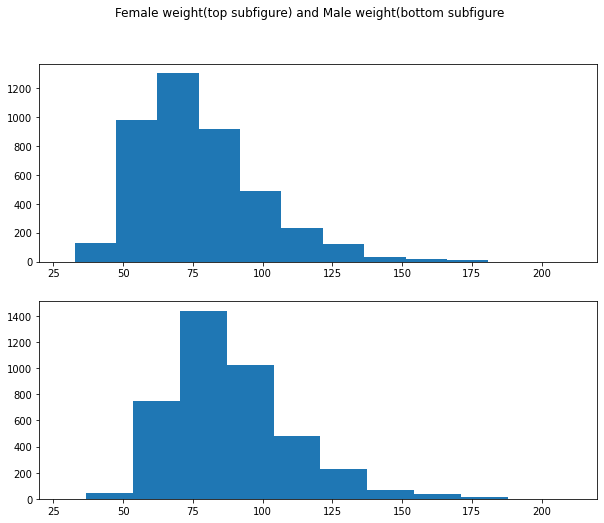

In [26]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8))
fig.suptitle('Female weight(top subfigure) and Male weight(bottom subfigure')
ax1.hist(female[:, 0])
ax2.hist(male[:, 0])
ax1.set_xlim(left=20, right=220)
ax2.set_xlim(left=20, right=220)
plt.show()

In [23]:
np.min(female[:, 0])

32.6